<center><img src="https://drive.google.com/uc?id=1mxOqs8zehrymPrtio0nzYpEuuNdPxzeX"></center>

## Spam vs Non-Spam

<img src = "https://drive.google.com/uc?id=1awekSNdO-DM8kRfkYXx5uLckz5u5NUts">

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V

Downloading...
From: https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
To: /content/spam_ham_dataset.csv
100% 5.50M/5.50M [00:00<00:00, 24.3MB/s]


In [ ]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


<img src = "https://drive.google.com/uc?id=1ynAaBApopFPGjHNz14ZcBqoBZcf8wOqw">

<img src = "https://drive.google.com/uc?id=1f6udyzbckhZYi7AUCyIyAIBno-CSEjPO">


## **Problem with Accuracy Metric**

#### What makes the accuracy a bad metric ?

1. Accuracy **doesn't work** when we have **imbalanced dataset**
2. As our **major goal** is to **correctly classify Spam data**,
 - Accuracy **lacks** in providing a **class-wise/granular metric**



<img src = "https://drive.google.com/uc?id=155cLJ3wSKhxKzy8gzJxfiHULQcJEsNrj">


## **Confusion Matrix**



#### How to overcome issues in accuracy  ?





<img src = "https://drive.google.com/uc?id=1yunr5J0I5ikEpMzpy3sxGikjrvRZ7gQU">


Lets create a 2 x 2 matrix for Spam (**Class 1/positive class)** and Not Spam (**Class0/Negative Class**), such that:

1. For the first cell we keep the count of samples
 - where $\hat{y_i} = 0 $, and  and $y_i = 0$
 - Lets call this **True Negative (TN)**

2. For the second cell we keep the count of samples
 - where $\hat{y_i} = 1 $, and  and $y_i = 0$
 - Lets call this **False Positive (FP)**

<br>

3. For the third cell we keep the count of samples
 - where $\hat{y_i} = 0 $, and  and $y_i = 1$
 - Lets call this **False Negative (FN)**

4. For the fourth cell we keep the count of samples
 - where $\hat{y_i} = 1 $, and  and $y_i = 1$
 - Lets call this **True Positive (TP)**


<br>

<img src = "https://drive.google.com/uc?id=1kzwjOmjgyTHoih9fuWbx6GST4-6js8yW">




<img src = "https://drive.google.com/uc?id=1GRTUjcL7e-5XxFBuLcI1O4kZ4BsvPZjI">


## **Understanding Confusion Matrix**

#### if the test data has 360 non-spam and 40 spam samples, then what will be **TF, TP, FP, FN** for an **ideal(Best) model** ?



<img src = "https://drive.google.com/uc?id=1QrEfwuDtYrzWkTj9oEDm6cKvHn6-cUIJ">


<img src = "https://drive.google.com/uc?id=1GEayAjr1PeUwh9j6YTiHFyreMRxXKsar">


<img src = "https://drive.google.com/uc?id=1NDxbOYzU0bdA5ts20Y2lw15o-IqTFyxG">


#### We have TP, TN , FP , FN, Can we find accuracy ?



- In Confusion Matrix, $TP+TN$ captures the correct prediction
- While, $TP+TN+FP+FN$ captures the total number of samples
<br>

Hence:
- $Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$


<img src = "https://drive.google.com/uc?id=1fjdmqFcq4ffvmrhzv0mMxoeY8WbLqj6U">


## **Confusion Matrix Code**

#### Lets use sklearn `confusion_matrix` function to get the values

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

NameError: name 'model' is not defined

In [ ]:
from matplotlib import pyplot as plt

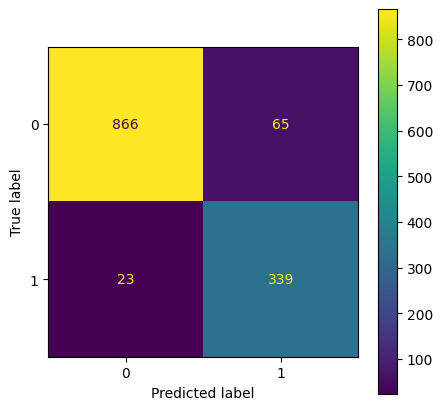

In [ ]:
# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [ ]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.934261407579273

## **Precision**


#### Is Confusion Matrix really better metric than Accuracy ?

<img src = "https://drive.google.com/uc?id=1xE-bxqxChDJWmqO1vebHX6OqqNG6P0_w">


<img src = "https://drive.google.com/uc?id=1Jx0BA94o2_paRQjlkhfNbRyz5NARH_xd">


<img src = "https://drive.google.com/uc?id=1eIScOkZ22r0Ai4e_QDFQAmfZv-6RJ6b8">


<img src = "https://drive.google.com/uc?id=1rI2Wf1GTFyQlnBSQigl7QGZQDoXyJ2L7">



<img src = "https://drive.google.com/uc?id=1dU8Hfh6pM7zcE-GvwOZPKpM7ZwREoxAR">


## **Precision Code**

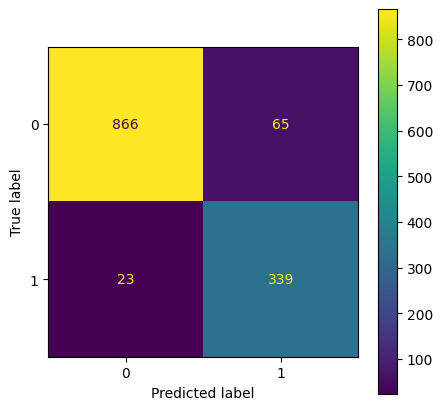

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)


Scratch Implementation

In [ ]:
def precision_calc(conf):
  tp = conf[1,1]
  fp = conf[0,1]

  return tp/(tp+fp)

In [ ]:
precision_calc(conf_matrix)

0.8582089552238806

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8582089552238806

**observe**

Even though the model has a lower precision value than accuracy:
- Its still a great model because of its high precision value


<img src = "https://drive.google.com/uc?id=1z8G5qbHu2el3FI_BZhlFssHUn4_ce1eA">



<img src = "https://drive.google.com/uc?id=1fJegWoR7aLZtI5rShc0RH3rbQGmnD5j8">



<img src = "https://drive.google.com/uc?id=17gW1__h3un8BfV_hIiEAQC8JCNEgNZqt">





Ans: As dumb model always predicts not-spam (class0):
- Its $TP =0$ and $FN = 45$ , hence $Recall = \frac{TP}{TP+FN} =  \frac{0}{0+45} = 0$






<br>

#### What will be the recall for an ideal model ?



<img src = "https://drive.google.com/uc?id=1JXJK7zeM5YdbkwE4LYmIAoEBhcEaWJUo">


## **Recall Code**

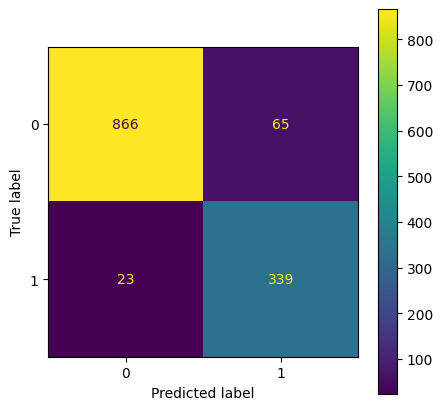

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

Scratch Implementation

In [ ]:
def recall_calc(conf):
  tp = conf[1,1]
  fn = conf[1,0]

  return tp/(tp+fn)

In [ ]:
recall_calc(conf_matrix)

0.9249329758713136

Using Sklearn's precision Score

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9249329758713136

**observe**

The model's recall value is almost very close to accuracy :
- It shows the  model has very low FN

## **Hack to remember Precision and Recall !**

#### What is the best way to remember the difference between Precision and Recall ?


<img src = "https://drive.google.com/uc?id=1Sm6gWFSO5Kyya_DaYgP1ajrar0NWXfi1">



## **F1 score**

#### Can both FN and FP be important for a real world problem ?



Lets take an example:


Imagine a model is used to classify credit card transactions as either fraudulent or legitimate.





<center><img src="https://drive.google.com/uc?id=1RE_xG9Nu-AOSwVIbJbiPxnJjs_8tPPF1"></center>







<center><img src='https://drive.google.com/uc?id=11IIhx7IdssLj8sqeNroyFd5M_iX7xm_6'></center>




As FN and FP are both important, we train three different models such that:

1. M1 has precision  = 0.3 and recall = 0.8
2. M2 has precision  = 0.2 and recall = 0.9
3. M3 has precision  = 0.7 and recall = 0.4



#### Which model among M1,M2,M3 is the best ?







<center><img src='https://drive.google.com/uc?id=1cst8BTzhX9tKbemVAAPx5f9LOYd1zhBU'></center>





Ans: Based on Precision:
- M3 is the best model

And based on Recall
- M2 is the best model

<br>

Hence need a way to combine Precision and Recall

#### We use **Harmonic mean**



<center><img src='https://drive.google.com/uc?id=1NMcxhA2zXYuVX-x6WCkEohYNK9-TNxsF'></center>




Harmonic Mean $  [Precision(Pr), Recall (Re)] =\frac{2}{\frac{1}{Pr}+\frac{1}{Re}} $

Which on solving becomes:
- Harmonic Mean $  = 2 \times \frac{Pr \times Re}{Pr+Re} $

<br>

**Note:** this harmonic mean of Precision and Recall is called **F1-Score**



<center><img src='https://drive.google.com/uc?id=1gnDMJkHe-k28YXxSz6EtbvGXT6n2xVyW'></center>




1. M1 has precision  = 0.3 and recall = 0.8
2. M2 has precision  = 0.2 and recall = 0.9
3. M3 has precision  = 0.7 and recall = 0.4

#### How does F1-score finds the better model ?

Ans) The  F1Score for each model:

1. M1: F1 score$ = 2 \times \frac{0.3 \times 0.8}{1.10} = 0.44$
2. M2: F1 score$ = 2 \times \frac{0.2 \times 0.9}{1.10} = 0.33$
3. M3: F1 score$ = 2 \times \frac{0.7 \times 0.4}{1.10} = 0.51$


<br>

Clearly, M3 is the best model to pick

# Imbalanced data


<img src = "https://drive.google.com/uc?id=1xfLuaf6uHYv1Dj-EIwOnZnG4oZbUYOnJ">


#### When do we say that data is imbalanced ?
Ans: when the **number of samples of a class exceeds** the number of samples of the other class:
1. if its a 70-30% Class sample ratio → **slightly imbalanced**

2. if its a 80-20%/90-10% Class sample ratio → **imbalanced**

3. if its a 95-5% Class sample ratio → **extremely imbalanced**


<br>

**Note:**
- The class which has **more number of samples → Majority Class**
- The class which has **less number of samples → Minority Class**







<img src = "https://drive.google.com/uc?id=1WPC-eeUdLAqOrq0w8SI8sXxEpPncZVn9">



We know data imbalance can be the cause for hindering the performance of our model,

#### How to make imbalance data balanced ?




<img src = "https://drive.google.com/uc?id=1nvtz6H78Lsw-nFfq3SxGzic9erVldNia">





<img src = "https://drive.google.com/uc?id=1teDmNvQDgwS8St3qEqyYqERPFqKwQYDV">



## **SMOTE (Synthetically Minority Oversampling Technique)**


#### How to create synthetic samples ?


<img src = 'https://drive.google.com/uc?id=1sjVNcblYIgYDVOqoB8Ztnh_pflm3Nv0D'>

Suppose from our Spam data:
- We randomly select a class1 label sample $x^{(1)}$

Now we find **Euclidean distance between this sample$x^{(1)}$ and all the remaining samples**:
- Pick the nearest 3 Class 1 label samples $x^{(5)},x^{(20)},x^{(10)} $


We then randomly choose a number between $[0,1]$, lets call it $ϕ$:
1. and multiply it with each of the Euclidean distances and add it to $x^{(1)}$

<img src="https://drive.google.com/uc?id=1IgKbpQcXRTLnRKaaQIzHPuOIF4c5yk3R" >




 - $x^{(new1)} = x^{(1)} +ϕ \times dist(x^{(1)},x^{(5)})$
 - $x^{(new2)} = x^{(1)} +ϕ \times dist(x^{(1)},x^{(20)})$
 - $x^{(new3)} = x^{(1)} +ϕ \times dist(x^{(1)},x^{(10)})$

This creates three new synthetic datapoints for our minority class

<br>

**Note:** This approach of creating new synthetic datapoint is called **SMOTE
(Synthetically Minority Oversampling Technique)**

<img src="https://drive.google.com/uc?id=1A3jp-n6U9j2YecNeRtbS9GvYK_gkUO46" width="700" >


Image shows briefly how  **SMOTE** creates data

<img src="https://drive.google.com/uc?id=1fe6MTXCZnaMy_IGlU69lionyZVoWegYu" >

<img src="https://drive.google.com/uc?id=1Fk6_gSVN8utgegxB5XbZ22TEh3NnN98R" >